# Predicting Heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart diseasse based on their medical attribuites. 

we're going to take the following steps: 

1. problem definition
2. Data
3. Evaluation metrics 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given Clinical parameters about a patient, can we predict whether or not they have heart disease? 

## 2. Data
> the original Data came from the Cleavland data from the UCI Machine Learning Repository

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features
> This is where you'll get different information about each of teh features in your data

**Create a Data Dictionary**


* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute



## Preparing the tools 
we're going to use numpy , pandas and matplotlib for data analysis ana manipulation

In [1]:
# Import all the tools we need 

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import models for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,RocCurveDisplay,auc,roc_auc_score

#for saving and sharing model 
import pickle 
import joblib

In [2]:
# Load data 
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data Exploration and Analysis (EDA)

The goal here is to find out more about the data and become a subject matter expert on dataset you're working 

1. What question(s) are you trying to solve? 
2. what kind of data do we have and how do we treat different types? 
3. what's missing from the data and how do you deal with us? 
4. Where are the outliers and why should you care about them? 
5. How can you add, change or remove features to get more out of your data? 

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

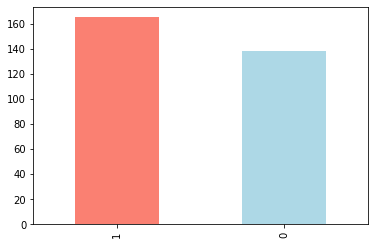

In [7]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

sex      0    1
target         
0       24  114
1       72   93


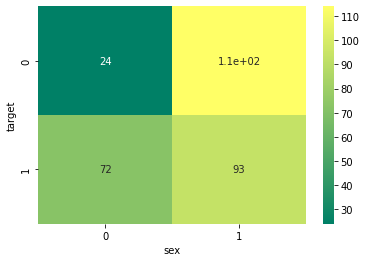

In [12]:
# compare target column with sex column
sns.heatmap(pd.crosstab(df.target,df.sex),annot=True,cmap='summer');
print(pd.crosstab(df.target,df.sex))

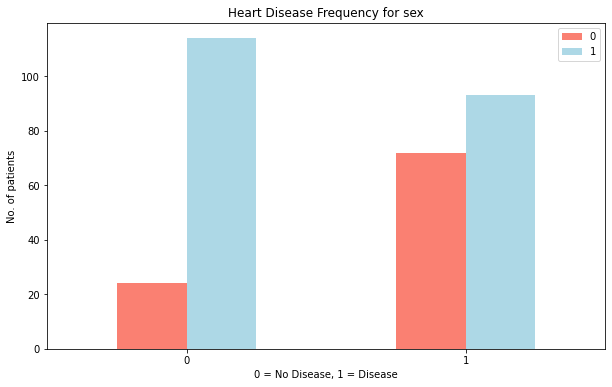

In [13]:
#Create a plot of crosstab 
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue'],figsize=(10,6))
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No. of patients")
plt.legend()
plt.xticks(rotation=0);

In [14]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs max heart_rate for target

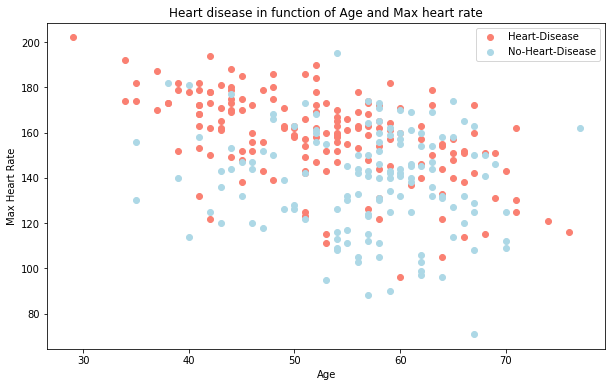

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon',label='Heart-Disease');

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue',label='No-Heart-Disease');
plt.legend()

#Add some helpfull info
plt.title("Heart disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

C:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


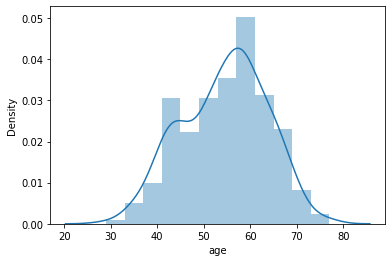

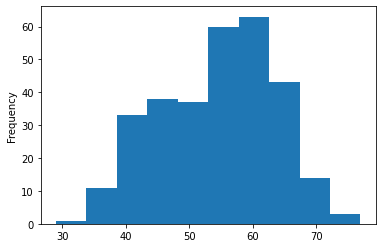

In [16]:
# Check the distribution of Age column with histogram
sns.distplot(df.age);
plt.show()
df.age.plot.hist(bins=10);

In [17]:
df.cp.value_counts() # types of chest pain

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

## Heart Disease Frequency per chest pain type

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


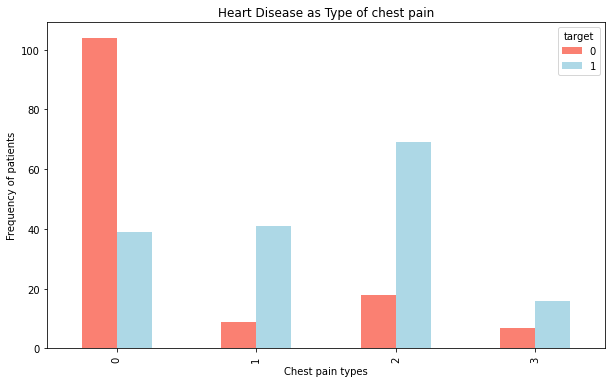

In [19]:
pd.crosstab(df.cp,df.target).plot.bar(figsize=(10,6),color=['salmon','lightblue']);
plt.xlabel("Chest pain types")
plt.ylabel("Frequency of patients");
plt.title("Heart Disease as Type of chest pain");

## Make Correlation matrix

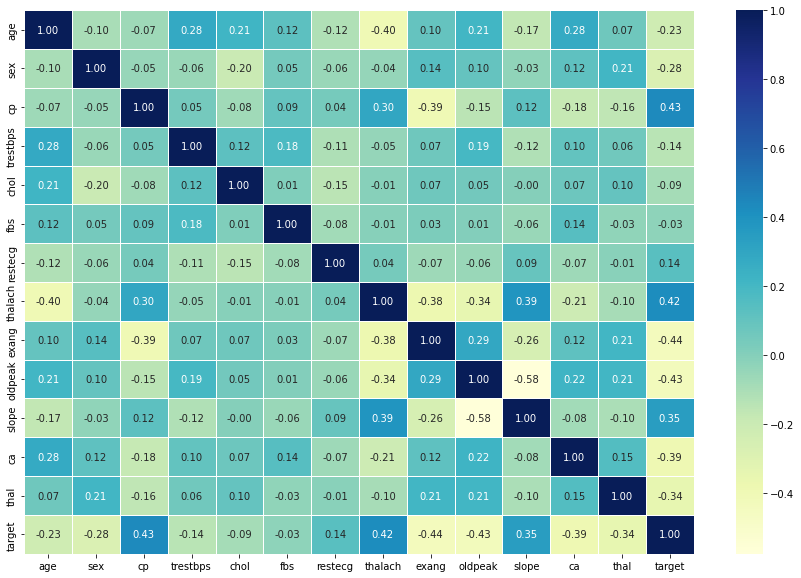

In [20]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,annot= True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

cp - 0.43 , thalach - 0.43 , slope = 0.35 This columns shows positive correlation with our target value
> Means there are potential that they are postively correlated to our target column so they might be helpful in concluding something

age - (-0.23), sex - (-0.28), exang - (-0.44), oldpeak - (-0.43), ca - (-0.39), thal - (-0.34) This columns have chance that they can be negatively correlated to target column 
>Means they an also be helpful in finding some inference from data

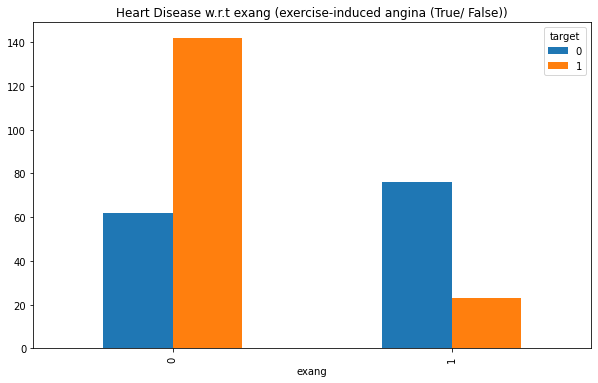

In [25]:
pd.crosstab(df.exang,df.target).plot.bar(figsize=(10,6)); #its has negative correlation with target column
plt.title("Heart Disease w.r.t exang (exercise-induced angina (True/ False))");

## Preparing our data for modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X = df.drop('target',axis=1) # spliting the data into features and label
y = df.target

In [33]:
#Split data into train and test set

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, df.shape

((242, 13), (61, 13), (242,), (61,), (303, 14))

Now we've got our data into training and test set , it's time to train our model in training set

we are going to try 3 machine learning models

1. Logistic Regression 
2. KNeareastNeighbour Classifier
3. Random Forest Classifier

In [41]:
#Put models in a dictionary
model_dict = {"Logistic Regression":LogisticRegression(),
              "KNN":KNeighborsClassifier(),
              "Random Forest Classifier":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: dict of different Scikit-learn models
    X_train: training data (features)
    X_test: testing data (Features)
    y_train: training data (labels)
    y_test: testing data (labels)
    """
    #Set random seed
    np.random.seed(42)
    #make dictionary to keep model scores 
    model_scores= {}
    # Loop through models
    for name, model in models.items():
        # Fit the model on training dat
        model.fit(X_train,y_train)
        # find the accuracy of model in test data and set that in dictionary
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

results = fit_and_score(model_dict,X_train,X_test,y_train,y_test);

C:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
results

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparision 

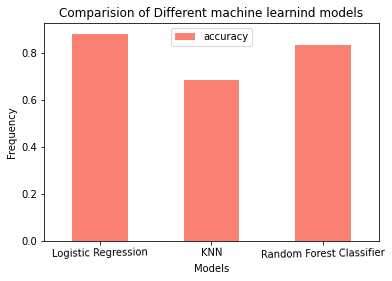

In [51]:
model_comparision = pd.DataFrame(results, index = ['accuracy'])
model_comparision.T.plot.bar(color='salmon')
plt.title("Comparision of Different machine learnind models")
plt.xlabel("Models")
plt.ylabel("Frequency")
plt.xticks(rotation = 1)
plt.show();

Now we've got a baseline model and we know a models first prediction aren't always we should should based our next steps off. What should we do. '

Let's look at the following 
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### HyperParameter tuning

In [53]:
# Let's tune KNN

train_scores=[]
test_scores=[]

#Create a list for different values for n_neighbours

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors: 
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [54]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [55]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

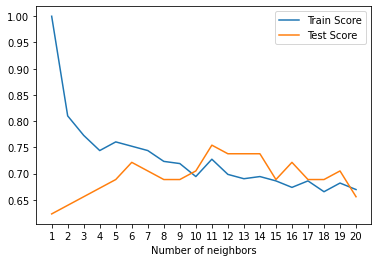

The maximum KNN score on the test data: 75.41%


In [59]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()

print(f"The maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're goint to tune: 
1. LogisticRegression()
2. RandomForestClassifier()

In [65]:
#Create a hyperparameter grid for LogisticRegression

log_reg_grid = { 'C':np.logspace(-4,4,20),#start,stop,numbers
                 'solver' :['liblinear']}

#Create hyperparamerter gric of Randomforestclassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}


In [61]:
# Tune logistics regression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5, 
                               n_iter=20,
                               verbose=True)

#fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [63]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've Tuned logistic regression let's do the same for **RandomForestClassifier**

In [66]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [68]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [69]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

since our LogisticRegression model provides the best result so far so we'll try and improve them again using GridSearchCV

In [70]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5, 
                         verbose = True)

#fitting model on training data
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [71]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
# Evaluate grid search regression model 
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [76]:
results

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

## Evaluating the model

In [78]:
# Evaluating our tuned machine learning classifier, beyong accuracy 

y_preds = gs_log_reg.predict(X_test)

In [80]:
y_probs_true = gs_log_reg.predict_proba(X_test)[:,1]

In [81]:
y_probs_true

array([0.13241554, 0.75571435, 0.81423847, 0.05461802, 0.88391595,
       0.87102204, 0.60476328, 0.00434615, 0.01374042, 0.56052339,
       0.71759392, 0.11919196, 0.88748682, 0.06007784, 0.96755244,
       0.93166805, 0.96410501, 0.09481397, 0.01772384, 0.02647224,
       0.71532475, 0.02719518, 0.14322136, 0.71680051, 0.88195478,
       0.6955244 , 0.84208963, 0.69308227, 0.01820273, 0.87774213,
       0.07166657, 0.0668742 , 0.01513403, 0.14314717, 0.6029917 ,
       0.12643663, 0.66234845, 0.85013748, 0.81923718, 0.84105421,
       0.54427848, 0.79280458, 0.77740321, 0.70510005, 0.83278827,
       0.02093854, 0.73149463, 0.93223095, 0.10221537, 0.06436393,
       0.13396007, 0.03539668, 0.80447275, 0.95313726, 0.31672378,
       0.00309999, 0.08713016, 0.93830966, 0.02815023, 0.01309175,
       0.06304264])

In [82]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
# Plot roc curve and calculate the Auc matric 

fpr, tpr , thresholds = roc_curve(y_test,y_probs_true)
roc_auc = auc(fpr, tpr)
roc_auc

0.9245689655172414

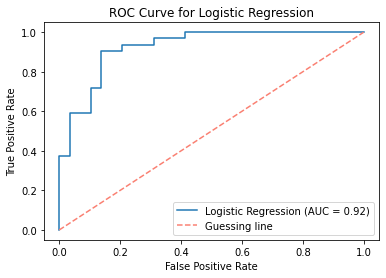

In [92]:
display = RocCurveDisplay(fpr = fpr , tpr = tpr, roc_auc=roc_auc , estimator_name="Logistic Regression")
display.plot()
plt.plot([0,1],[0,1],color='salmon',linestyle='--',label = "Guessing line")
plt.legend()
plt.title("ROC Curve for Logistic Regression")
plt.show();

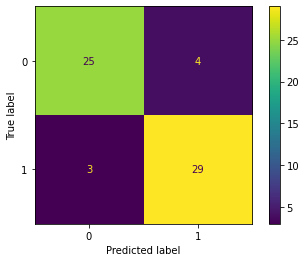

In [104]:
# Confusion matrix
cm = confusion_matrix(y_test,y_preds)
disp = ConfusionMatrixDisplay(cm,display_labels=gs_log_reg.classes_);
disp.plot();

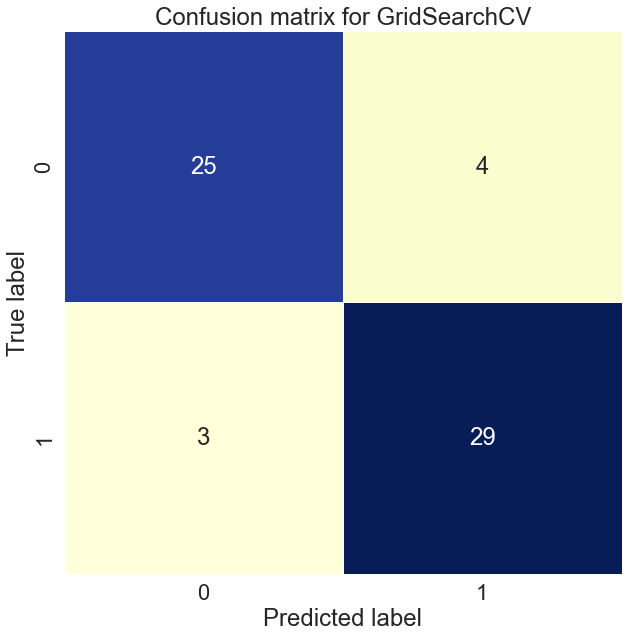

In [112]:
sns.set(font_scale=2)
cm = confusion_matrix(y_test,y_preds)
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm, cbar= False, annot= True,cmap='YlGnBu',linewidths=0.5)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix for GridSearchCV");

Let's get an Classification report and Crossvalidated precision and recall score


In [114]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calculate evalution metrics using cross-validation**

In [115]:
precision = np.mean(cross_val_score(gs_log_reg,X,y,cv=5,scoring='precision'))
precision

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8207936507936507

In [116]:
recall = np.mean(cross_val_score(gs_log_reg,X,y,cv=5,scoring='recall'))
recall

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.9212121212121213

In [117]:
F1_score = np.mean(cross_val_score(gs_log_reg,X,y,cv=5,scoring='f1'))
F1_score

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8673007976269721

In [118]:
accuracy = np.mean(cross_val_score(gs_log_reg,X,y,cv=5,scoring='accuracy'))
accuracy

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8446448087431694

In [120]:
cv_metrics = pd.DataFrame({"Accuracy":accuracy,
                          "Precision":precision,
                          "Recall":recall,
                          "F1 Score":F1_score},index=["value"])
cv_metrics

,Accuracy,Precision,Recall,F1 Score
value,0.844645,0.820794,0.921212,0.867301


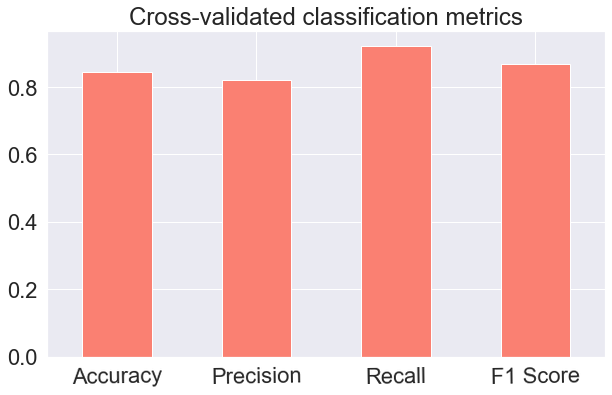

In [138]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False,figsize=(10,6),color='salmon');
plt.xticks(rotation=1);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Do search how to find features importance on Logistric regression model 

In [141]:
# fit an instance of LogisticRegression 

clf = LogisticRegression(C= 0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [142]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [143]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [146]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

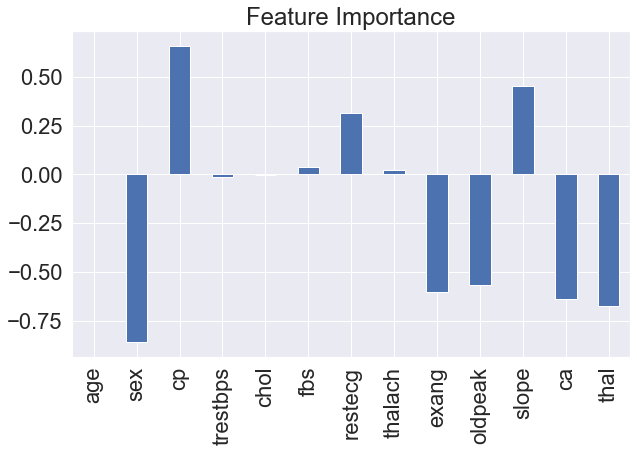

In [153]:
# Visualize features importance
# This is called model driven Data analysis
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend= False,figsize=(10,6));

## 6. Experimentation

* Could you collect more data? 
* could you try a better model? Like Catboost or XGBoost
* Could you improve the current models? Beyond what we've done so far
* If your model is good enough (you have hit your evaluation metric )how wou8ld you export it and share it with others? 

In [154]:
pickle.dump(gs_log_reg,open("GridSearchCV_LogisticRegresion.pkl","wb"))

#### To load model again
`loaded_model = pickle.load(open("GridSearchCV_LogistricRegresion.pkl","rb"))`
